In [65]:
import pandas as pd
import numpy as np

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

# Recommendation System

# Using KNN

Read Data

In [76]:
user = pd.read_csv("ratings (1).csv")
rating = pd.read_csv("RatingsCount.csv")
book= pd.read_csv("FinalData.csv")

In [77]:
book

,book_id,authors,title,Genres
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama
1,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,Fantasy;Young-Age
2,3,Stephenie Meyer,"Twilight (Twilight, #1)",Fantasy
3,4,Harper Lee,To Kill a Mockingbird,Self-Help;Drama
4,5,F. Scott Fitzgerald,The Great Gatsby,Drama
...,...,...,...,...
994,995,Michelle Hodkin,"The Unbecoming of Mara Dyer (Mara Dyer, #1)",Fiction
995,996,Janet Evanovich,"Three to Get Deadly (Stephanie Plum, #3)",Crime
996,997,Emmuska Orczy,The Scarlet Pimpernel,History;Fiction
997,998,"Jon Stone, Michael J. Smollin",The Monster at the End of this Book,Fiction;Kids


## Clean the data

In [78]:
# Apply the clean_title function to the 'Titles' column or row
book['Cleaned Titles'] = book['title'].apply(lambda x: clean_title(x))

# Print the original and cleaned data
print(book[['title', 'Cleaned Titles']])

                                                 title  \
0              The Hunger Games (The Hunger Games, #1)   
1    Harry Potter and the Sorcerer's Stone (Harry P...   
2                              Twilight (Twilight, #1)   
3                                To Kill a Mockingbird   
4                                     The Great Gatsby   
..                                                 ...   
994        The Unbecoming of Mara Dyer (Mara Dyer, #1)   
995           Three to Get Deadly (Stephanie Plum, #3)   
996                              The Scarlet Pimpernel   
997                The Monster at the End of this Book   
998        Tales of a Fourth Grade Nothing (Fudge, #1)   

                            Cleaned Titles  
0                         The Hunger Games  
1    Harry Potter and the Sorcerer's Stone  
2                                 Twilight  
3                    To Kill a Mockingbird  
4                         The Great Gatsby  
..                               

In [79]:
book

,book_id,authors,title,Genres,Cleaned Titles
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,The Hunger Games
1,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,Fantasy;Young-Age,Harry Potter and the Sorcerer's Stone
2,3,Stephenie Meyer,"Twilight (Twilight, #1)",Fantasy,Twilight
3,4,Harper Lee,To Kill a Mockingbird,Self-Help;Drama,To Kill a Mockingbird
4,5,F. Scott Fitzgerald,The Great Gatsby,Drama,The Great Gatsby
...,...,...,...,...,...
994,995,Michelle Hodkin,"The Unbecoming of Mara Dyer (Mara Dyer, #1)",Fiction,The Unbecoming of Mara Dyer
995,996,Janet Evanovich,"Three to Get Deadly (Stephanie Plum, #3)",Crime,Three to Get Deadly
996,997,Emmuska Orczy,The Scarlet Pimpernel,History;Fiction,The Scarlet Pimpernel
997,998,"Jon Stone, Michael J. Smollin",The Monster at the End of this Book,Fiction;Kids,The Monster at the End of this Book


In [80]:
book.shape

(999, 5)

In [81]:
book.describe()

,book_id
count,999.000000
mean,500.000000
std,288.530761
min,1.000000
25%,250.500000
50%,500.000000
75%,749.500000
max,999.000000


# Exploratory Data Analysis

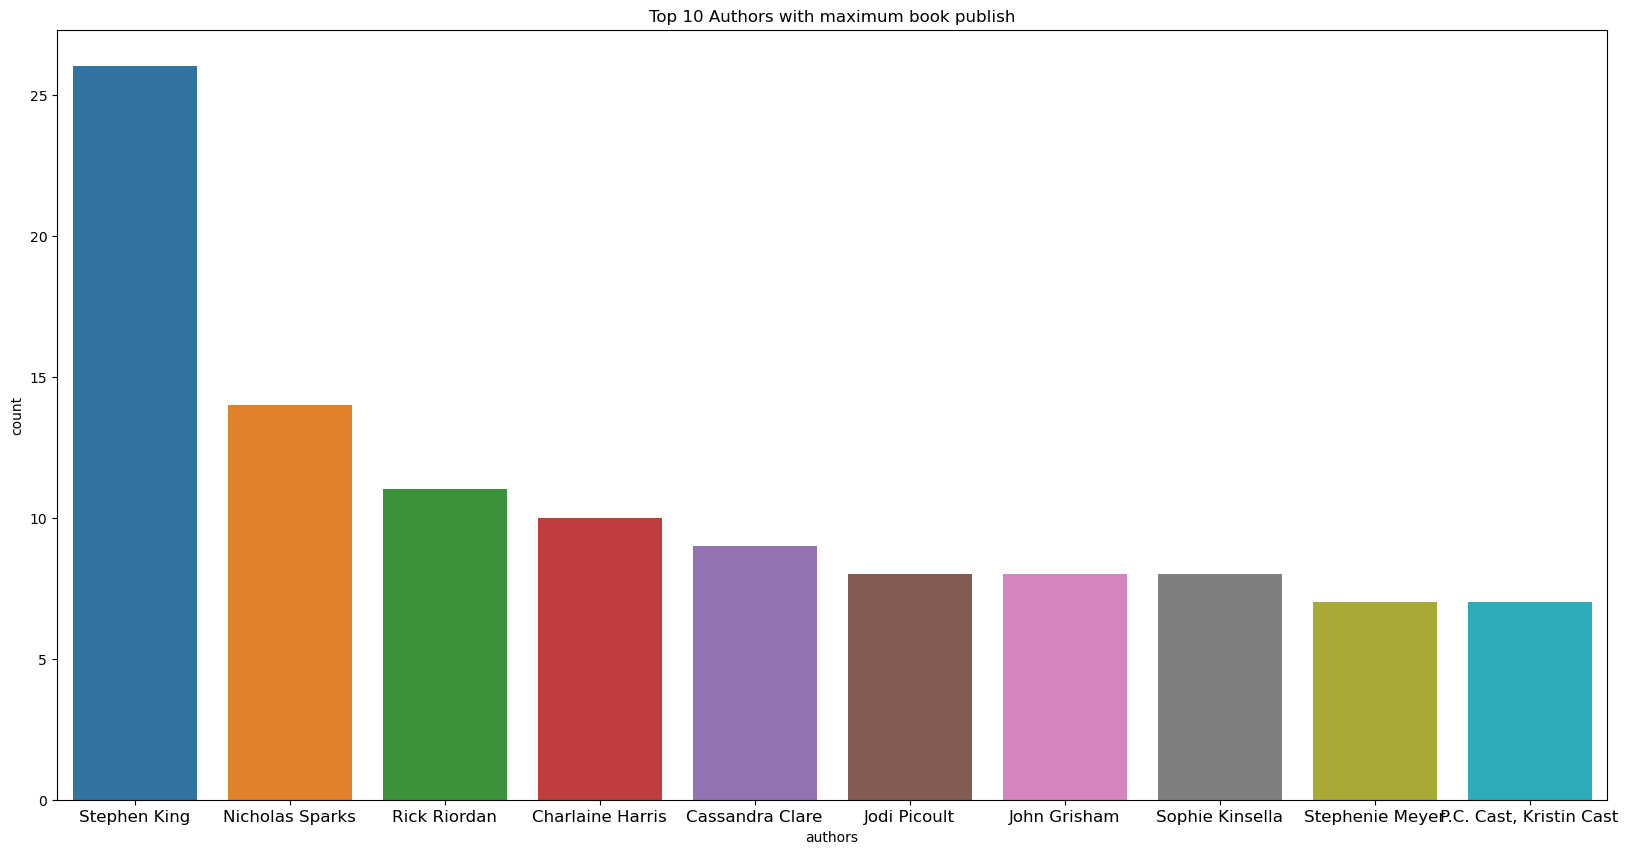

In [49]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'authors', data = book,
             order = book['authors'].value_counts().iloc[:10].index)
plt.title("Top 10 Authors with maximum book publish")
plt.xticks(fontsize = 12)
plt.show()

In [82]:
# Show all columns in DataFrame
pd.set_option('display.max_columns', None)

In [84]:
book.head()

,book_id,authors,title,Genres,Cleaned Titles
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,The Hunger Games
1,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,Fantasy;Young-Age,Harry Potter and the Sorcerer's Stone
2,3,Stephenie Meyer,"Twilight (Twilight, #1)",Fantasy,Twilight
3,4,Harper Lee,To Kill a Mockingbird,Self-Help;Drama,To Kill a Mockingbird
4,5,F. Scott Fitzgerald,The Great Gatsby,Drama,The Great Gatsby


In [86]:
user.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [87]:
user.describe()

,book_id,user_id,rating
count,99897.000000,99897.000000,99897.000000
mean,500.001171,24318.633803,3.817392
std,288.391630,14908.508561,1.036053
min,1.000000,7.000000,1.000000
25%,250.000000,11577.000000,3.000000
50%,500.000000,22243.000000,4.000000
75%,750.000000,36415.000000,5.000000
max,999.000000,53403.000000,5.000000


In [95]:
book = book.dropna()

user = user.sort_values("user_id")
user.drop_duplicates(subset=["user_id","book_id"], keep='first', inplace=True) 
book.drop_duplicates(subset='Cleaned Titles', keep='first', inplace=True)

In [109]:
merged_df = pd.merge(book, user, how='left', left_on=['book_id'], right_on=['book_id'])
df = merged_df[['book_id','Cleaned Titles', 'user_id', 'rating']]

df = df.rename(columns = {'id':'book_id'})
df.head(200)

,book_id,Cleaned Titles,user_id,rating
0,1,The Hunger Games,314,5
1,1,The Hunger Games,439,3
2,1,The Hunger Games,588,5
3,1,The Hunger Games,1169,4
4,1,The Hunger Games,1185,4
...,...,...,...,...
195,2,Harry Potter and the Sorcerer's Stone,51166,5
196,2,Harry Potter and the Sorcerer's Stone,51460,4
197,2,Harry Potter and the Sorcerer's Stone,51838,4
198,2,Harry Potter and the Sorcerer's Stone,52036,3


In [113]:
merged_df = pd.merge(book, user, how='left', left_on=['book_id'], right_on=['book_id'])

In [120]:
merged_df

,book_id,authors,title,Genres,Cleaned Titles,user_id,rating
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,The Hunger Games,314,5
1,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,The Hunger Games,439,3
2,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,The Hunger Games,588,5
3,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,The Hunger Games,1169,4
4,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,The Hunger Games,1185,4
...,...,...,...,...,...,...,...
99527,999,Judy Blume,"Tales of a Fourth Grade Nothing (Fudge, #1)",Kids,Tales of a Fourth Grade Nothing,46527,5
99528,999,Judy Blume,"Tales of a Fourth Grade Nothing (Fudge, #1)",Kids,Tales of a Fourth Grade Nothing,47528,5
99529,999,Judy Blume,"Tales of a Fourth Grade Nothing (Fudge, #1)",Kids,Tales of a Fourth Grade Nothing,47746,5
99530,999,Judy Blume,"Tales of a Fourth Grade Nothing (Fudge, #1)",Kids,Tales of a Fourth Grade Nothing,49830,5


In [121]:
df = merged_df[['book_id','Cleaned Titles', 'user_id', 'rating']]

In [122]:
df = df.rename(columns = {'id':'book_id'})
df.head(200)

,book_id,Cleaned Titles,user_id,rating
0,1,The Hunger Games,314,5
1,1,The Hunger Games,439,3
2,1,The Hunger Games,588,5
3,1,The Hunger Games,1169,4
4,1,The Hunger Games,1185,4
...,...,...,...,...
195,2,Harry Potter and the Sorcerer's Stone,51166,5
196,2,Harry Potter and the Sorcerer's Stone,51460,4
197,2,Harry Potter and the Sorcerer's Stone,51838,4
198,2,Harry Potter and the Sorcerer's Stone,52036,3


In [123]:
df.describe()

,book_id,user_id,rating
count,99532.000000,99532.000000,99532.000000
mean,499.822469,24329.367741,3.817506
std,288.005091,14908.920146,1.035772
min,1.000000,7.000000,1.000000
25%,251.000000,11599.000000,3.000000
50%,500.000000,22243.000000,4.000000
75%,749.000000,36478.000000,5.000000
max,999.000000,53403.000000,5.000000


In [124]:
ratings_df = df.pivot_table(index='book_id',columns='user_id',values='rating').fillna(0)

pd.set_option('display.max_columns', 100)
ratings_df.head()

user_id,7,35,41,75,143,146,153,158,173,178,202,215,220,230,233,244,247,248,251,256,274,290,307,314,319,321,323,325,329,335,338,341,342,343,349,352,362,363,366,368,377,381,387,403,407,424,430,439,446,461,...,52895,52901,52905,52929,52930,52937,52938,52949,52956,52965,52972,52977,52994,53005,53012,53019,53022,53028,53054,53057,53059,53060,53085,53107,53130,53145,53165,53173,53174,53183,53186,53194,53199,53204,53245,53251,53268,53278,53279,53281,53292,53293,53318,53332,53352,53354,53356,53366,53381,53403
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
ratings_df.shape

(997, 6240)

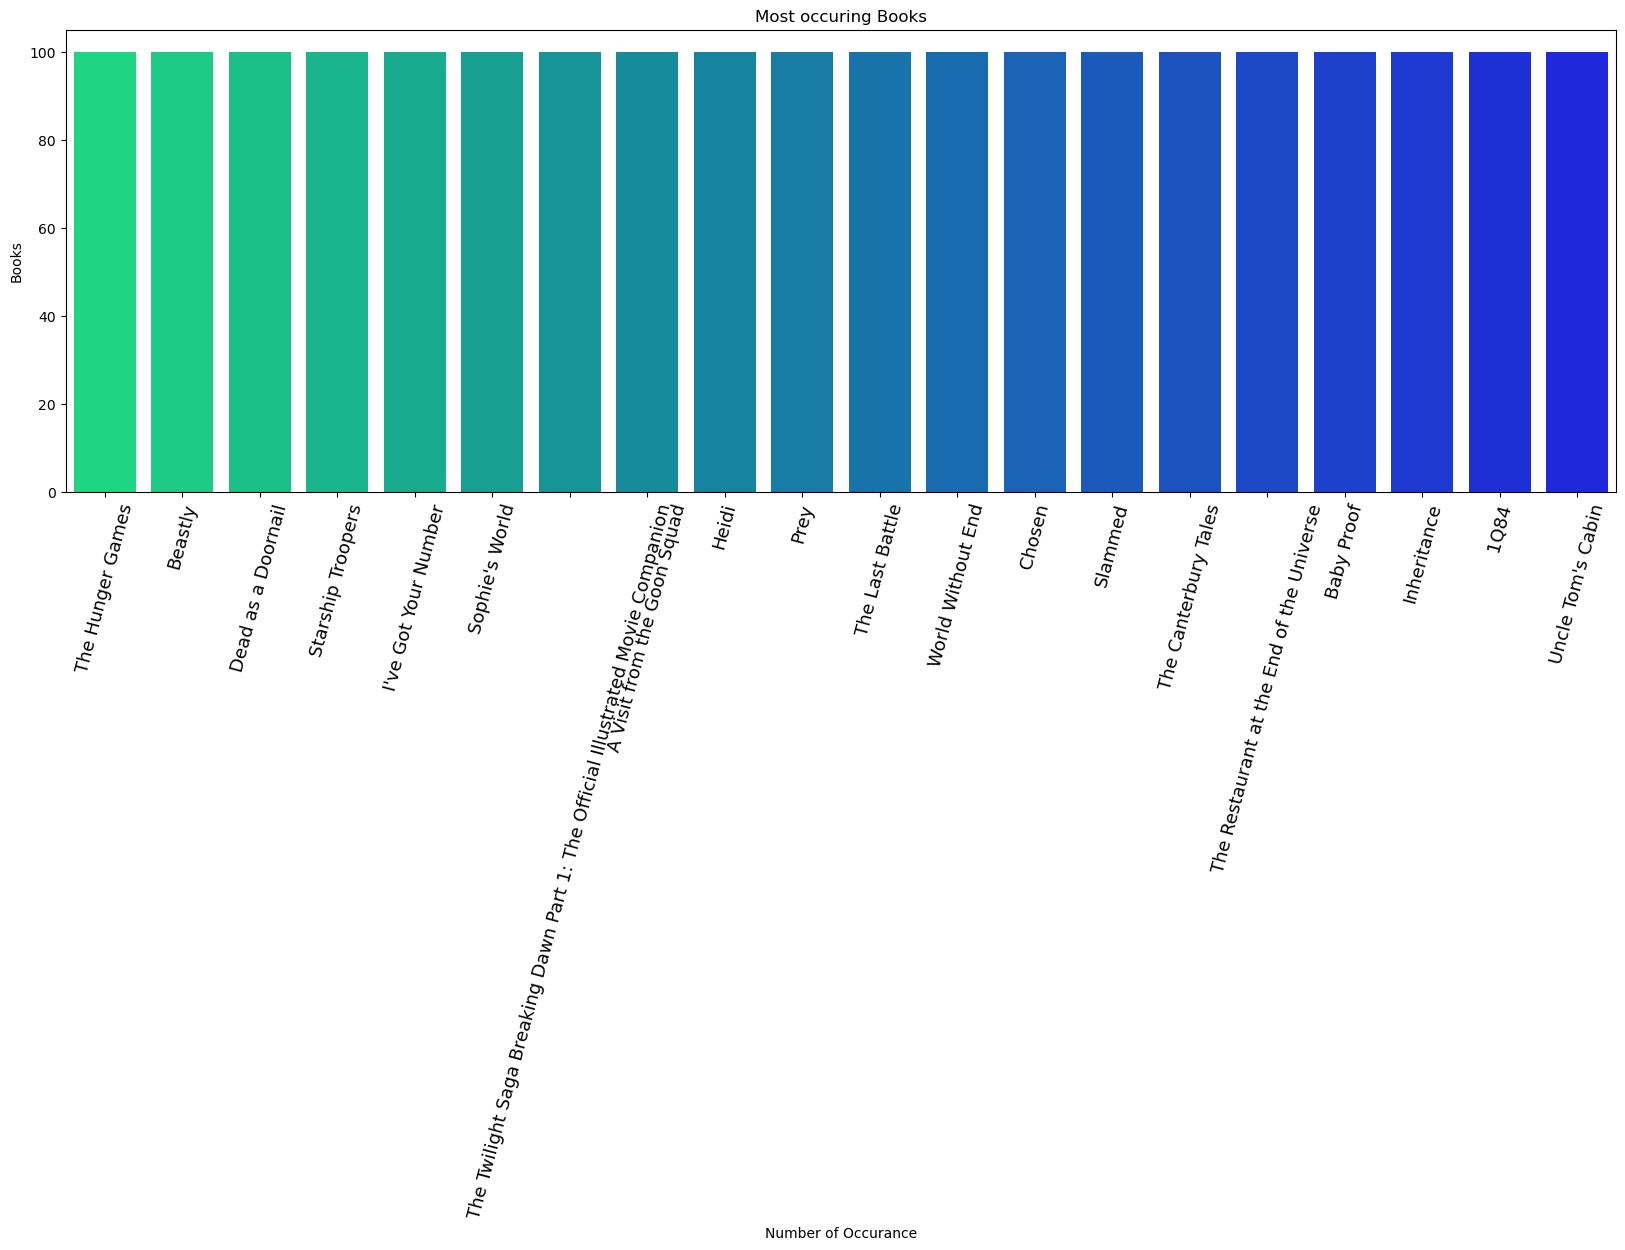

In [131]:
# to find most occuring book in our data
plt.figure(figsize = (20, 6))
book = df['Cleaned Titles'].value_counts()[:20]
sns.barplot(x = book.index, y = book,
           palette = 'winter_r')
plt.title("Most occuring Books")
plt.xlabel("Number of Occurance")
plt.ylabel("Books")
plt.xticks(rotation = 75, fontsize = 13)
plt.show()


In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [134]:
# Show all columns in DataFrame
pd.set_option('display.max_columns', None)

In [135]:
ratings_matrix = csr_matrix(ratings_df.values)

In [136]:
model_knn = NearestNeighbors(metric='cosine', algorithm = 'brute')
model_knn.fit(ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

Some Helper Function

In [138]:
def get_book_id(book_title):
    target_df = df.loc[df['Cleaned Titles'] == book_title]
    return target_df['book_id'].iloc[0]

id_TheHungerGames = get_book_id('The Hunger Games')
print(id_TheHungerGames)

1


In [139]:
def get_title(book_id):
    target_df = df.loc[df['book_id'] == book_id]
    return target_df['Cleaned Titles'].iloc[0]

print(get_title(1))

The Hunger Games


In [140]:
def get_recomm(book_title, num_neighbors=10, display=False): 
    book_ids = []
    
    query_index = get_book_id(book_title) - 1
    
    if num_neighbors > 0:
        distances, indices = model_knn.kneighbors(ratings_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = num_neighbors + 1)
    else:
        distances, indices = model_knn.kneighbors(ratings_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 10 + 1)
    
    for i in range(0, len(distances.flatten())):
        if display is True:
            if i == 0:
                print('Recommendations for ', book_title, '\n')
            else:    
                print('{0}\t Book ID: {1}\t  Distance: {2}:\n'.format(i, ratings_df.index[indices.flatten()[i]], distances.flatten()[i]))
        
        book_ids.append(ratings_df.index[indices.flatten()[i]])
    
    return book_ids

# Hybrid Recommendation System

In [141]:
# Top 10 recommendations for The Hunger Games

recommendations_for_TheHungerGames = get_recomm('The Hunger Games', num_neighbors=10, display=True)

Recommendations for  The Hunger Games 

1	 Book ID: 17	  Distance: 0.4053256862294832:

2	 Book ID: 31	  Distance: 0.42674642418525066:

3	 Book ID: 2	  Distance: 0.4444738573252147:

4	 Book ID: 20	  Distance: 0.4523031603835689:

5	 Book ID: 3	  Distance: 0.49084774300774026:

6	 Book ID: 93	  Distance: 0.5119913445564398:

7	 Book ID: 5	  Distance: 0.5197672572777041:

8	 Book ID: 16	  Distance: 0.5229117539369219:

9	 Book ID: 9	  Distance: 0.5271915645842881:

10	 Book ID: 37	  Distance: 0.5278079122055651:



In [142]:
for b in recommendations_for_TheHungerGames[1:]:
    print('id:', b, '\t\tBook: ', get_title(b))

id: 17 		Book:  Catching Fire
id: 31 		Book:  The Help
id: 2 		Book:  Harry Potter and the Sorcerer's Stone
id: 20 		Book:  Mockingjay
id: 3 		Book:  Twilight
id: 93 		Book:  The Secret Garden
id: 5 		Book:  The Great Gatsby
id: 16 		Book:  The Girl with the Dragon Tattoo
id: 9 		Book:  Angels & Demons
id: 37 		Book:  The Lion, the Witch, and the Wardrobe


In [144]:
# Top 10 recommendations for Harry Potter and the Philosopher's Stone

book_ids_for_H = get_recomm('Harry Potter and the Sorcerer\'s Stone' , num_neighbors=10)
# skip the first item
for b in book_ids_for_H[1:]:
    print(get_title(b))

To Kill a Mockingbird
Memoirs of a Geisha
1984
The Great Gatsby
The Fellowship of the Ring
Lord of the Flies
Harry Potter and the Prisoner of Azkaban
The Hobbit
The Diary of a Young Girl
Jane Eyre


In [145]:
# Top 15 recommendations for Twilight

book_ids_for_H = get_recomm('Twilight', num_neighbors=15)
for b in book_ids_for_H[1:]:
    print(get_title(b))

Harry Potter and the Sorcerer's Stone
Pride and Prejudice
The Hunger Games
Memoirs of a Geisha
The Kite Runner
The Catcher in the Rye
The Book Thief
The Alchemist
The Giver
The Diary of a Young Girl
The Fellowship of the Ring
The Girl with the Dragon Tattoo
The Lovely Bones
Jane Eyre
Fahrenheit 451


C:\Users\HP\AppData\Local\Temp\ipykernel_22604\1802250528.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'])


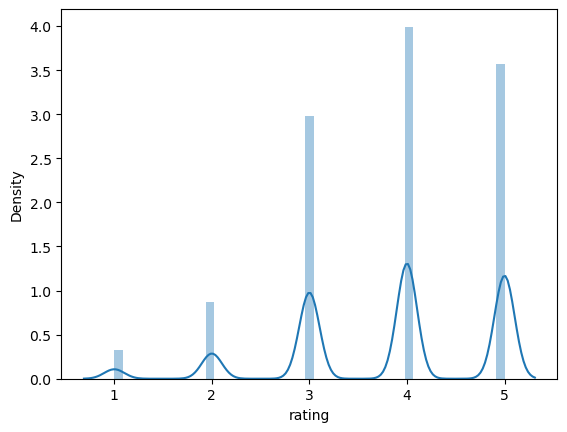

In [149]:
sns.distplot(df['rating'])
plt.show()

In [152]:
book = df['Cleaned Titles'].value_counts()[:20]
book

The Hunger Games                                                                    100
Beastly                                                                             100
Dead as a Doornail                                                                  100
Starship Troopers                                                                   100
I've Got Your Number                                                                100
Sophie's World                                                                      100
The Twilight Saga Breaking Dawn Part 1: The Official Illustrated Movie Companion    100
A Visit from the Goon Squad                                                         100
Heidi                                                                               100
Prey                                                                                100
The Last Battle                                                                     100
World Without End               

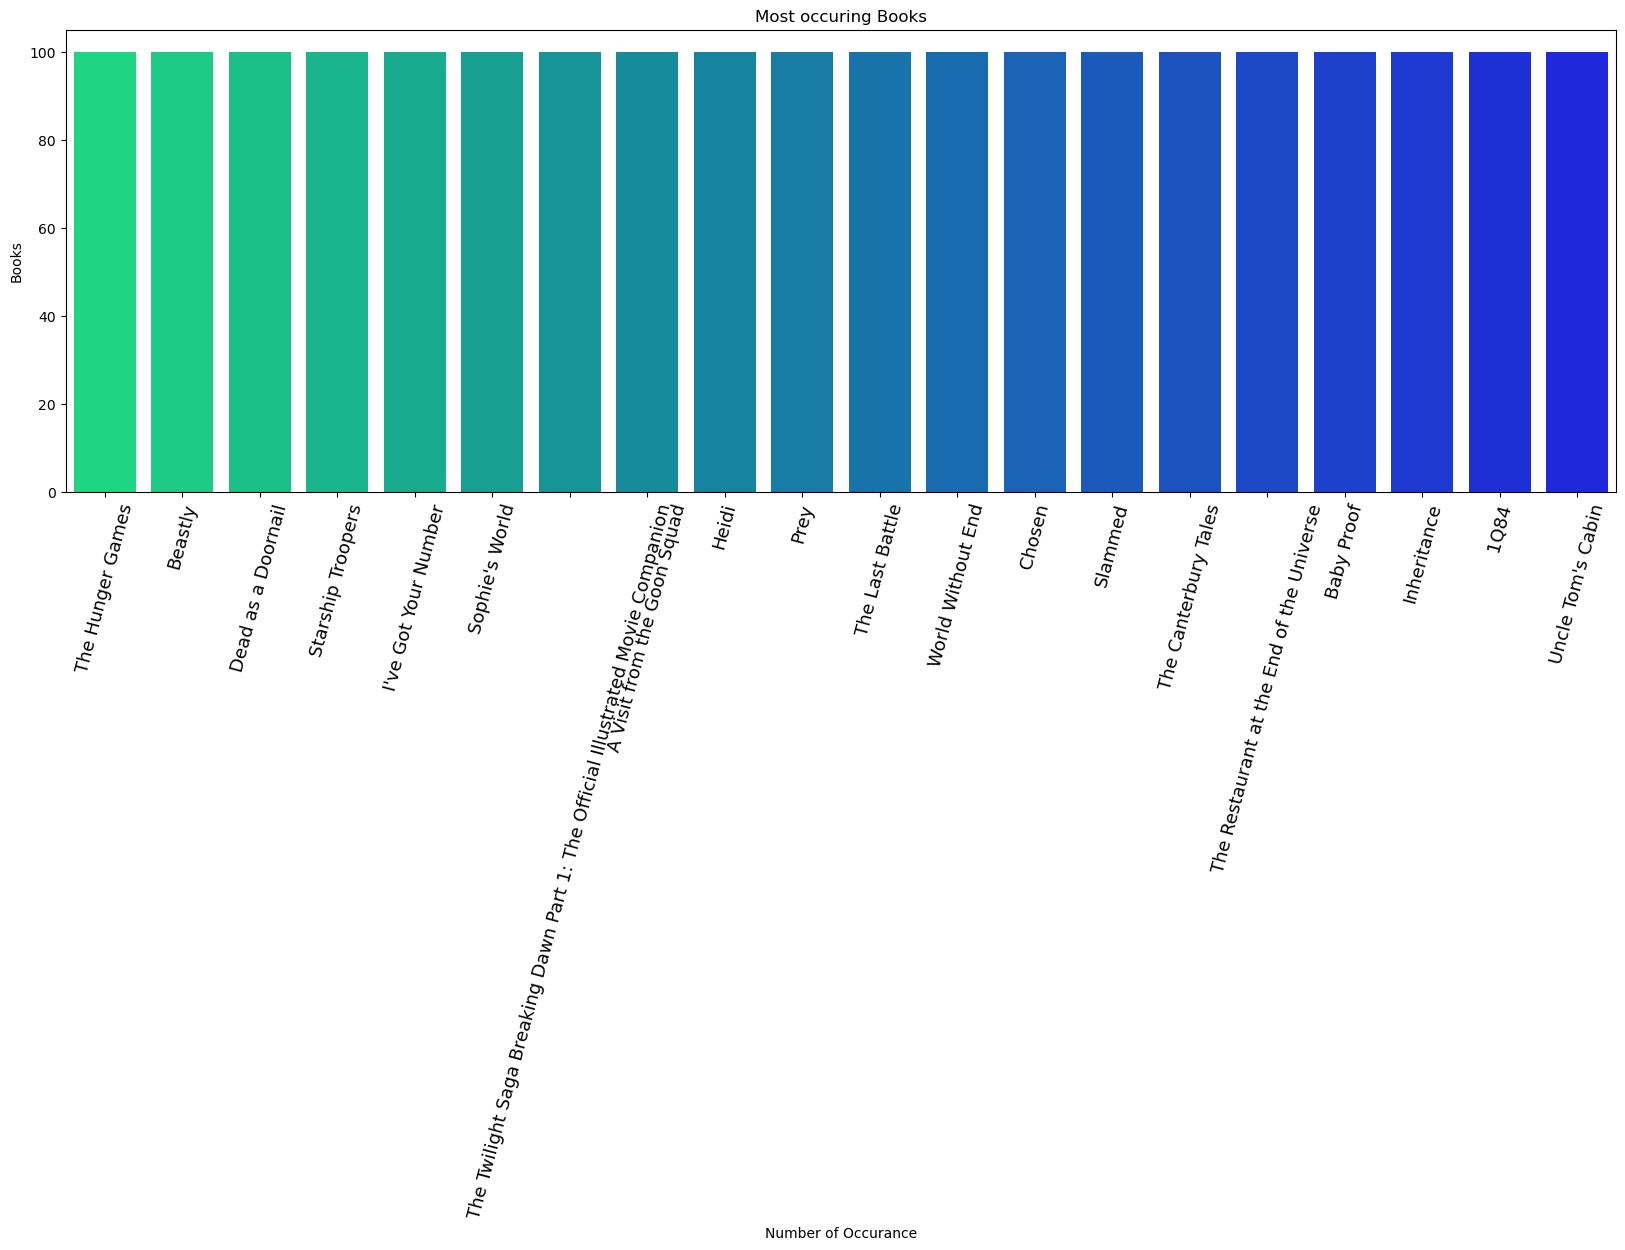

In [154]:
# to find most occuring book in our data
plt.figure(figsize = (20, 6))
book = df['Cleaned Titles'].value_counts()[:20]
sns.barplot(x = book.index, y = book,
           palette = 'winter_r')
plt.title("Most occuring Books")
plt.xlabel("Number of Occurance")
plt.ylabel("Books")
plt.xticks(rotation = 75, fontsize = 13)
plt.show()